In [1]:
%ls

LICENSE                            dataset/
News_sentiment_analysis_new.ipynb  submission3.csv
README.md                          trained-models/


%cd drive/My\ Drive/SIC\ -\ BigData/8.\ Project/

In [1]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats
#from sklearn.externals import joblib
# import joblib
# import nltk
# nltk.download('stopwords')
# print('Downloaded Stopwords')
# from nltk.corpus import stopwords
# import re
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.model_selection import GridSearchCV
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import HashingVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
import string
punctuations = string.punctuation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
#Import dataset
train = pd.read_csv('dataset/train_file.csv')
test = pd.read_csv('dataset/test_file.csv')

In [4]:
train.head()
#train.drop(["IDLink"], inplace=True, axis=1)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [5]:
train.loc[0,'Headline']

'Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor'

In [6]:
train.loc[0,'Title']

'Obama Lays Wreath at Arlington National Cemetery'

In [7]:
test.head()
#test.drop(["IDLink"], inplace=True, axis=1)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


In [8]:
#Đếm NaN Ở Các Cột
missing_val = pd.DataFrame(train.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,IDLink,0
1,Title,0
2,Headline,0
3,Source,175
4,Topic,0
5,PublishDate,0
6,Facebook,0
7,GooglePlus,0
8,LinkedIn,0
9,SentimentTitle,0


In [9]:
train[train['Source'].isna()]

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
6,lKg2pImhCl,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0,0,0,0.000000,-0.005906
56,ZOKue2cqfO,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 09:29:00,0,0,0,0.000000,0.048546
111,JXfRvxs0R6,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 00:15:00,0,0,0,-0.243068,0.048546
350,A1YOXDsuOO,Human rights situation in Palestinian territor...,In a special meeting convened by the UN Human ...,NaN,palestine,2015-10-28 17:24:00,-1,-1,-1,-0.228299,-0.124931
409,fO2mYsUg5P,Japan Contributes $5.73M To UNRWA’s Food Assis...,"JERUSALEM, October 31, 2015 (WAFA) – The Japan...",NaN,palestine,2015-10-31 04:30:00,-1,-1,-1,0.166667,-0.042878
...,...,...,...,...,...,...,...,...,...,...,...
55482,FJZonPtvqe,"Monday, 28 Mar 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-28 04:35:00,0,0,0,-0.243068,0.068465
55483,NanKfuNzsO,"Saturday, 16 Apr 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-28 04:36:00,-1,-1,-1,0.000000,0.068465
55486,ovFBb4XFt4,"Sunday, 17 Apr 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-28 05:07:00,-1,-1,-1,0.000000,0.068465
55620,H2PlLqiX9U,"Tuesday, 29 Mar 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-28 14:06:00,0,0,0,-0.243068,0.068465


In [10]:
#train.dropna(inplace=True)

In [11]:
test[test['Source'].isna()]

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
78,tgkeH242IX,"Tuesday, 19 Apr 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-29 07:24:00,-1,-1,-1
207,6EnfIIM2XK,"Wednesday, 30 Mar 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-29 14:10:00,0,0,0
456,QVFvknH8BH,"Thursday, 21 Apr 2016","RAMALLAH, March 30, 2016 (WAFA) – On the occas...",NaN,palestine,2016-03-30 02:36:00,-1,-1,-1
469,ssRPV1RQKA,"Wednesday, 30 Mar 2016","RAMALLAH, March 30, 2016 (WAFA) – On the occas...",NaN,palestine,2016-03-30 03:37:00,-1,-1,-1
514,jZ35MMRYnw,"Wednesday, 30 Mar 2016","RAMALLAH, March 30, 2016 (WAFA) – On the 40 th...",NaN,palestine,2016-03-30 06:51:00,0,0,0
...,...,...,...,...,...,...,...,...,...
26920,KjltvY9p6K,May Economy Watchers Survey:Expectations index...,The latest announced May Economy Watchers Surv...,NaN,economy,2016-06-08 19:13:00,-1,0,0
26962,ycqBL8nI3c,May Economy Watchers Survey:Current Trends Ind...,The latest announced May Economy Watchers Surv...,NaN,economy,2016-06-08 22:10:00,-1,0,0
29254,o9lTYSMTJe,Microsoft Announces Quarterly Div of US36 Cent...,Microsoft announced that the quarterly dividen...,NaN,microsoft,2016-06-14 22:11:00,-1,0,0
30545,EMy4yLPi0I,U.S. California Surpasses France as World's 6t...,California is now the sixth-largest economy in...,NaN,economy,2016-06-17 21:59:00,0,0,0


In [12]:
#Nếu 'Source==NaN' thì cho nó bằng 'Source' xuất hiện nhiều nhất
most_frequent = test['Source'].mode()[0]
test.fillna({'Source':most_frequent}, inplace=True)
#test[test['PublishDate'] == '2016-03-29 07:24:00'].head()

train = train.drop(columns=['PublishDate','Facebook','LinkedIn','GooglePlus'])
train.head()

test = test.drop(columns=['PublishDate','Facebook','LinkedIn','GooglePlus'])
test.head()

### **EDA - Data Visualization**

In [1]:
# # - Biểu đồ dựa trên trang báo → Xem xu hướng cảm xúc của tờ báo
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# # Đếm số lượng bài báo cho mỗi trang báo
# source_counts = train['Source'].value_counts().nlargest(20).index

# # Lọc dữ liệu chỉ giữ lại 20 trang báo có số lượng bài báo nhiều nhất
# top_sources_df = train[train['Source'].isin(source_counts)]

# # Nhóm dữ liệu theo tên trang báo và tính trung bình cảm xúc cho mỗi nhóm
# sentiment_df = top_sources_df.groupby('Source')[['SentimentTitle', 'SentimentHeadline']].mean().reset_index()

# # Thiết lập kích thước và phong cách của biểu đồ
# plt.figure(figsize=(14, 7))
# sns.set(style="whitegrid")

# # Vẽ biểu đồ cho cảm xúc tiêu đề
# sns.barplot(x='Source', y='SentimentTitle', data=sentiment_df, color='b', alpha=0.7, label='SentimentTitle')

# # Vẽ biểu đồ cho cảm xúc tiêu đề phụ
# sns.barplot(x='Source', y='SentimentHeadline', data=sentiment_df, color='r', alpha=0.5, label='SentimentHeadline')

# # Thiết lập tiêu đề và nhãn
# plt.title('Distribution of Sentiments by Top 20 News Sources')
# plt.xlabel('News Source')
# plt.ylabel('Average Sentiment')
# plt.xticks(rotation=45)
# plt.legend()

# # Hiển thị biểu đồ
# plt.show()


# # - Biểu đồ cảm xúc dựa trên chủ đề → Chủ đề tiêu cực hay tích cực
# # - Biểu đồ mức độ tương tác của người dùng các mạng xã hội đối với cảm xúc
# # - Biểu đồ phân phối các nhãn cảm xúc
# # - Xu hướng cảm xúc dựa trên ngày phát hành


In [14]:
sns.set_theme(style='darkgrid',palette='Set1')

In [15]:
#%pip install scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

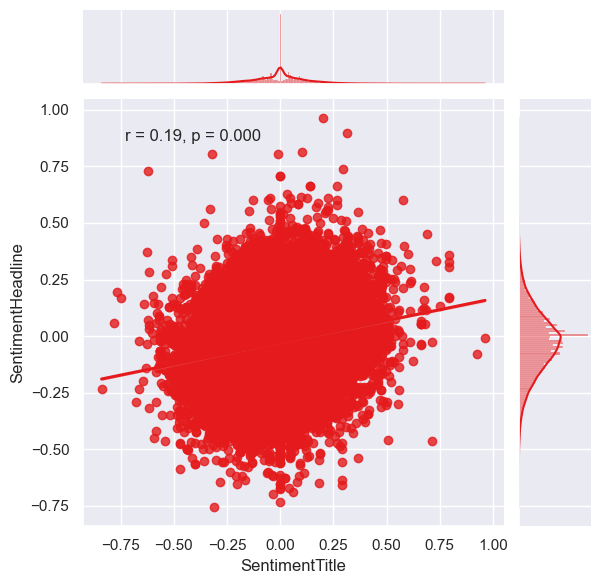

In [16]:
_ = sns.jointplot(x='SentimentTitle',y='SentimentHeadline',data=train,kind = 'reg')

# Calculate Pearson correlation
r, p = stats.pearsonr(train['SentimentTitle'], train['SentimentHeadline'])

# Annotate the plot
plt.annotate(f'r = {r:.2f}, p = {p:.3f}',
             xy=(0.1, 0.9), xycoords='axes fraction')

plt.show()

#_.annotate(stats.pearsonr)
#plt.show()

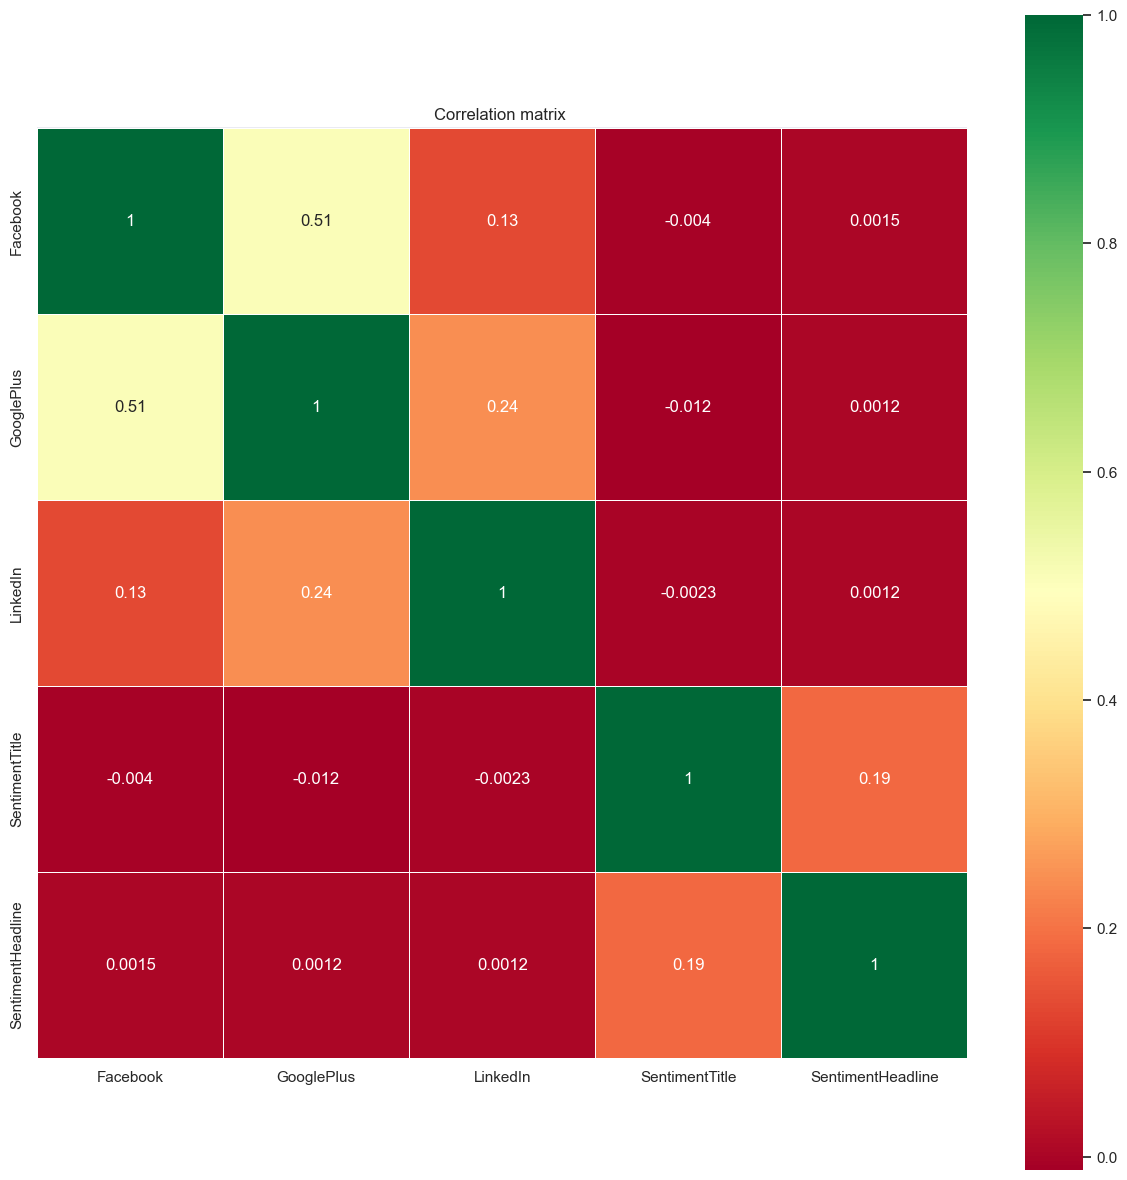

In [17]:
plt.figure(figsize=(15,15))
_ = sns.heatmap(train[['Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')

plt.show()

In [18]:
train.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'Facebook', 'GooglePlus', 'LinkedIn', 'SentimentTitle',
       'SentimentHeadline'],
      dtype='object')

In [19]:
train.shape

(55932, 11)

In [20]:
train.index

RangeIndex(start=0, stop=55932, step=1)

### Loading spacy English model

In [21]:
nlp = English()

### Custom Tokenizer
#ternimal ==> python -m spacy download en_core_web_sm

In [22]:
# Creating our tokenizer function - lemmatized, lowercased; remove "-PRON"s, stop_words, punctuations
nlp = spacy.load('en_core_web_sm')
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized (từ gốc dạng hiện tại) and lowercased
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Removing stop words using stopword from spacy library and punctuations from string library
    # stop_words này bao gồm cả các "-PRON-"
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    # return preprocessed list of tokens
    return mytokens

In [23]:
#Test Tokenizer function
sample_text = '"""""""It is the biggest investment in Las Vegas since the crash,"""""" said Professor Stephen Miller, director of the Centre for Business and Economic'
tokens = spacy_tokenizer(sample_text)
print(tokens)

['big', 'investment', 'las', 'vegas', 'crash', 'professor', 'stephen', 'miller', 'director', 'centre', 'business', 'economic']


### Custom Transformer and text cleaner

In [24]:
# # remove html
# from bs4 import BeautifulSoup
# def remove_html(raw_text):
#     text = BeautifulSoup(raw_text,"lxml").get_text()
#     return text

# #remove date
# from dateutil.parser import parse
# def remove_date(raw_text):
#     try:
#         _,text = parse(raw_text,fuzzy_with_tokens=True, tzinfos= {
#         "AST": tz.gettz("America/Santo_Domingo"),  # Example: Atlantic Standard Time
#         "I": tz.gettz("Asia/Colombo"),            # Example: India Standard Time
#         "IP": tz.gettz("Pacific/Port_Moresby"),   # Example: Island Pacific Time
#         "EST": tz.gettz("America/New_York"),      # Example: Eastern Standard Time
#         "ET": tz.gettz("America/New_York"),       # Example: Eastern Time
#         "STATE": tz.gettz("Australia/Sydney"),    # Example: Standard Time Australia Eastern
#         "M": tz.gettz("Asia/Riyadh"),             # Example: Makkah Standard Time
#         "PMAST": tz.gettz("Pacific/Pago_Pago"),  # Example: Pacific/Pago_Pago Time
#         "ETAST": tz.gettz("Pacific/Enderbury"),  # Example: Pacific/Enderbury Time
#         "FW": tz.gettz("Pacific/Fakaofo"),  # Ví dụ: Fakaofo Time (FW)
#     })
#     except:
#         text = raw_text
#     return text

# #test
# sample_text_html = 'As Obama reminded the world during the recent Paris climate talks, """"""I am an island boy,&quot; which means he has special empathy for the small'
# sample_text_html = 'China\'s central bank on Monday cut the proportion of funds banks must set aside as reserves, in Beijing\'s latest attempt to tackle slowing growth in the world\'s second largest economy. The People\'s Bank of China (PBoC) said in a statement it would trim the so-called &quot;reserve requirement ratio&quot; (RRR) for financial institutions by 0.50 percentage points, freeing up more funds for them to lend. The'
# sample_text_date = 'RAMALLAH, February 25, 2016 (WAFA) - Palestine Liberation Organization’s Sectretary-General Saeb Erekat Thursday expressed his concerns over Kenyan President Uhuru Kenyatta’s visit to Jerusalem and the Jordan Valley.'
# sample_text_date = 'ABC'
# print(remove_date(sample_text_date));

In [62]:
from bs4 import BeautifulSoup

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}
def clean_text(text):
     # thêm <html> để tắt warning text không phải dạng html
    text = BeautifulSoup("<html>"+text+"</html>", "lxml").get_text()
    return str(text).strip().lower()

In [97]:
# bow_vector = CountVectorizer(max_features = 100,tokenizer = spacy_tokenizer,ngram_range=(1,2))
tfidf_vector = TfidfVectorizer(max_features=100,tokenizer=spacy_tokenizer,ngram_range=(1, 2))

In [98]:
X_train_title = train.loc[:,'Title'].values
y_train_title = train.loc[:,['SentimentTitle']].values

X_train_headline = train.loc[:,'Headline'].values
y_train_headline = train.loc[:,['SentimentHeadline']].values

In [99]:
X_test_title = test.loc[:,'Title'].values
X_test_headline = test.loc[:,'Headline'].values

In [100]:
X_train_title.shape

(55932,)

In [101]:
X_train_headline.shape

(55932,)

In [102]:
y_train_headline.shape

(55932, 1)

In [103]:

x_train_title, x_valid_title, Y_train_title, y_valid_title = train_test_split(X_train_title, y_train_title, shuffle = True, test_size = 0.1)
x_train_headline, x_valid_headline, Y_train_headline, y_valid_headline = train_test_split(X_train_headline, y_train_headline, shuffle = True, test_size = 0.1)

In [105]:
abs_y_train_title=np.sign(Y_train_title)
abs_y_train_headline=np.sign(Y_train_headline)
abs_y_valid_title=np.sign(y_valid_title)
abs_y_valid_headline=np.sign(y_valid_headline)

### XGBoost Regressor


In [106]:
# xgboost = MultiOutputRegressor(XGBRegressor())
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=None,
                                                          random_state=0))

In [109]:
pipe1 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('regressor', regr_multirf)])

pipe2 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('regressor', regr_multirf)])

#### Title model generation

In [110]:
pipe1.fit(x_train_title,Y_train_title)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x138f53690>),
                ('vectorizer',
                 TfidfVectorizer(max_features=100, ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x30ba3e480>)),
                ('regressor',
                 MultiOutputRegressor(estimator=RandomForestRegressor(random_state=0)))])

In [111]:
pipe2.fit(x_train_headline,Y_train_headline)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x138ed7fd0>),
                ('vectorizer',
                 TfidfVectorizer(max_features=100, ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x30ba3e480>)),
                ('regressor',
                 MultiOutputRegressor(estimator=RandomForestRegressor(random_state=0)))])

In [112]:
test_pred_title=pipe1.predict(x_valid_title)

In [113]:
test_pred_headline=pipe2.predict(x_valid_headline)

In [115]:
mae_title=mean_absolute_error(y_valid_title,test_pred_title)

In [116]:
mae_headline=mean_absolute_error(y_valid_headline,test_pred_headline)

In [117]:
score=1-((0.4*mae_title)+(0.6*mae_headline))

In [118]:
#Score của tập valid
score

0.8992026619409362

In [82]:
pred_title=pipe1.predict(X_test_title)

In [83]:
pred_headline=pipe2.predict(X_test_headline)

In [84]:
submission=pd.DataFrame()

In [85]:
submission['IDLink']=test['IDLink'].to_list()
submission['SentimentTitle']=pred_title
submission['SentimentHeadline']=pred_headline

<h1>View Submisson File</h1>

In [86]:
submission.head()

,IDLink,SentimentTitle,SentimentHeadline
0,tFrqIR6Chj,-0.031003,-0.031349
1,DVAaGErjlF,-0.022338,0.040360
2,OT9UIZm5M2,-0.022338,-0.037751
3,lflGp3q2Fj,-0.033256,-0.013995
4,zDYG0SoovZ,-0.090915,-0.056369


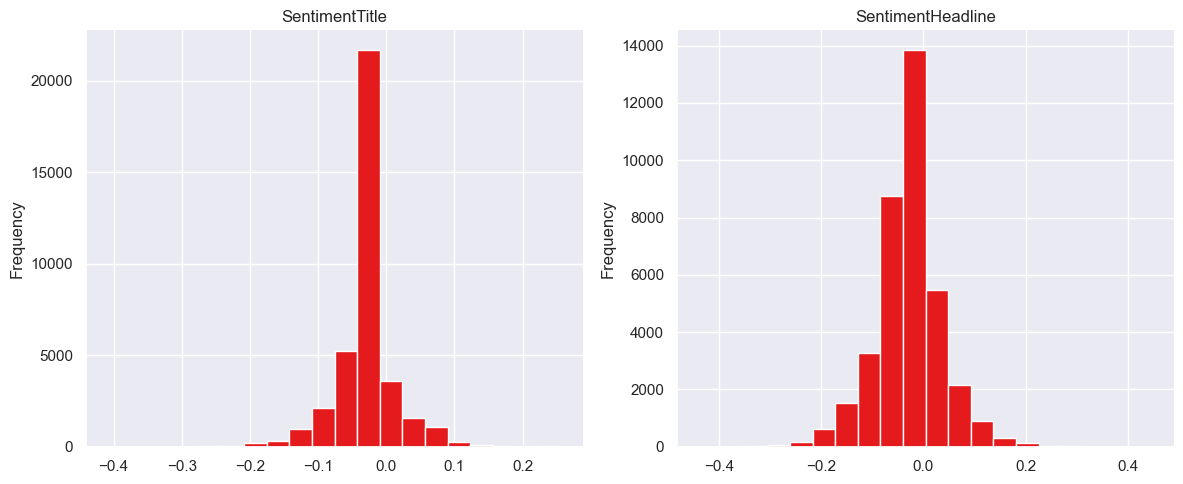

In [87]:
# Tạo một figure với hai trục (axes)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Vẽ biểu đồ phân phối của SentimentTitle trên trục thứ nhất
submission['SentimentTitle'].plot(kind='hist', bins=20, ax=axes[0], title='SentimentTitle')
axes[0].spines[['top', 'right']].set_visible(False)

# Vẽ biểu đồ phân phối của SentimentHeadline trên trục thứ hai
submission['SentimentHeadline'].plot(kind='hist', bins=20, ax=axes[1], title='SentimentHeadline')
axes[1].spines[['top', 'right']].set_visible(False)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [88]:
submission.to_csv('submission3.csv')

<h1>Play Ground

In [89]:
X_test_tit = np.array(["The US economy is getting better day by day"], dtype=object)
X_test_head = np.array(["The US economy is getting worse day by day"], dtype=object)
pred_title = pipe1.predict(X_test_tit)
pred_headline = pipe2.predict(X_test_head)


In [90]:
print(f"Title prediction: {pred_title[0, 0]}")
print(f"Headline prediction: {pred_headline[0, 0]}")

Title prediction: 0.0735843177106666
Headline prediction: -0.014549726678021376


In [3]:
# %pip install transformers
# %pip install SentencePiece
# %pip install huggingface_hub
import huggingface_hub
huggingface_hub.login()



In [6]:
# Load model directly
from transformers import AutoTokenizer, AutoModelWithLMHead

# Load the model and tokenizer

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-11b")
model = AutoModelWithLMHead.from_pretrained("google-t5/t5-11b")

# Define the task and input text
task_prefix = "summarize: "
input_text = "This is a simple example of text that we want to summarize."

# Encode the input text
input_ids = tokenizer(task_prefix + input_text, return_tensors="pt").input_ids

# Generate the output
output_ids = model.generate(input_ids)

# Decode the output text
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print("Input text:", input_text)
print("Output text:", output_text)


config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/opt/anaconda3/lib/python3.11/site-packages/transformers/models/auto/modeling_auto.py:1731: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:982: UserWarning: Not enough free disk space to download the file. The expected file size is: 45229.45 MB. The target location /Users/yudhna_/.cache/huggingface/hub/models--google-t5--t5-11b/blobs only has 17513.79 MB free disk space.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/45.2G [00:00<?, ?B/s]

KeyboardInterrupt: 